In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel("Train_data.xlsm")

In [ ]:
df.head()

,ID,Week,Region,Year,Milky_way_demand,Medusa_demand,Cosmos_redshift_demand,Andromeda_demand
0,demand_id_2105,1,1,2009,26,264,311,107
1,demand_id_2106,2,1,2009,28,263,310,632
2,demand_id_2107,3,1,2009,29,265,311,737
3,demand_id_2108,4,1,2009,28,266,312,317
4,demand_id_2109,5,1,2009,26,267,309,947


In [ ]:
#Total demand - Region Wise
df_region = df.groupby('Region').sum()[['Milky_way_demand','Medusa_demand','Cosmos_redshift_demand','Andromeda_demand']]
df_region

,Milky_way_demand,Medusa_demand,Cosmos_redshift_demand,Andromeda_demand
Region,,,,
1,10347,83820,97217,247479
2,10754,84116,96736,267009
3,10802,84000,97265,272784
4,10568,83841,97640,249999


In [ ]:
df.shape

(1248, 8)

In [ ]:
df_r1 = df[df['Region']==1]
df_r2 = df[df['Region']==2]
df_r3 = df[df['Region']==3]
df_r4 = df[df['Region']==4]
df_r1.shape

(312, 8)

In [ ]:
df_r1['lag'] = np.arange(1,313,1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_r1.tail()

,ID,Week,Region,Year,Milky_way_demand,Medusa_demand,Cosmos_redshift_demand,Andromeda_demand,lag
1087,demand_id_3192,48,1,2014,41,274,311,737,308
1088,demand_id_3193,49,1,2014,40,271,310,737,309
1089,demand_id_3194,50,1,2014,38,269,307,842,310
1090,demand_id_3195,51,1,2014,32,272,302,842,311
1091,demand_id_3196,52,1,2014,32,272,307,527,312


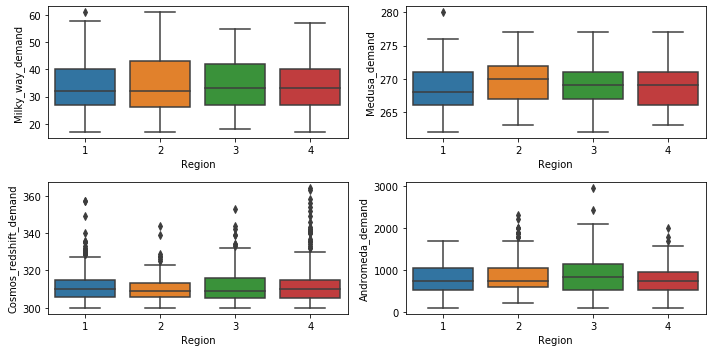

In [ ]:
#Entire Data
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(y='Milky_way_demand',x='Region',data=df)
plt.subplot(2,2,2)
sns.boxplot(y='Medusa_demand',x='Region',data=df)
plt.subplot(2,2,3)
sns.boxplot(y='Cosmos_redshift_demand',x='Region',data=df)
plt.subplot(2,2,4)
sns.boxplot(y='Andromeda_demand',x='Region',data=df)
plt.tight_layout()

In [ ]:
df_9 = df[df['Year']==2009]
df_9.head()

,ID,Week,Region,Year,Milky_way_demand,Medusa_demand,Cosmos_redshift_demand,Andromeda_demand
0,demand_id_2105,1,1,2009,26,264,311,107
1,demand_id_2106,2,1,2009,28,263,310,632
2,demand_id_2107,3,1,2009,29,265,311,737
3,demand_id_2108,4,1,2009,28,266,312,317
4,demand_id_2109,5,1,2009,26,267,309,947


NameError: ignored

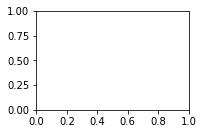

In [ ]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.boxplot(y='Milky_way_demand',x='Region',data=df[df['Year']==2009+i])
    #plt.title(2009+i)


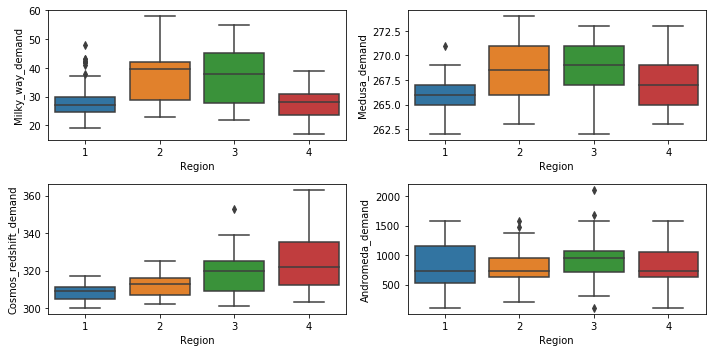

In [ ]:
#Only for 2009
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(y='Milky_way_demand',x='Region',data=df_9)
plt.subplot(2,2,2)
sns.boxplot(y='Medusa_demand',x='Region',data=df_9)
plt.subplot(2,2,3)
sns.boxplot(y='Cosmos_redshift_demand',x='Region',data=df_9)
plt.subplot(2,2,4)
sns.boxplot(y='Andromeda_demand',x='Region',data=df_9)
plt.tight_layout()

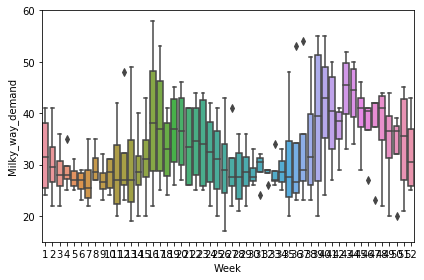

In [ ]:
sns.boxplot(y='Milky_way_demand',x='Week',data=df_9)
plt.tight_layout()

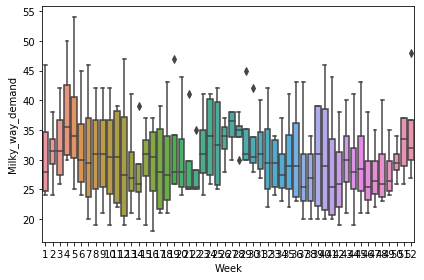

In [ ]:
sns.boxplot(y='Milky_way_demand',x='Week',data=df[df['Year']==2010])
plt.tight_layout()

In [ ]:
df_demand = df.iloc[: , 4:8]

NameError: ignored

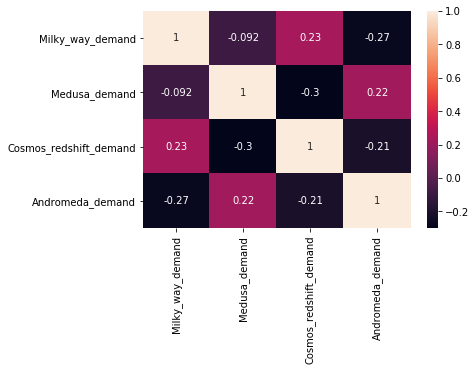

In [ ]:
sns.heatmap(df_demand.corr(),annot=True)

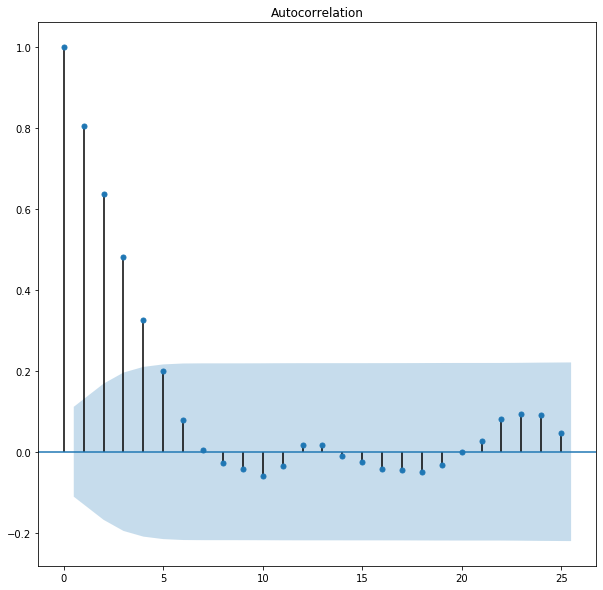

In [ ]:
#ACF graph
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(x=df_r1['Milky_way_demand'])

plt.show()


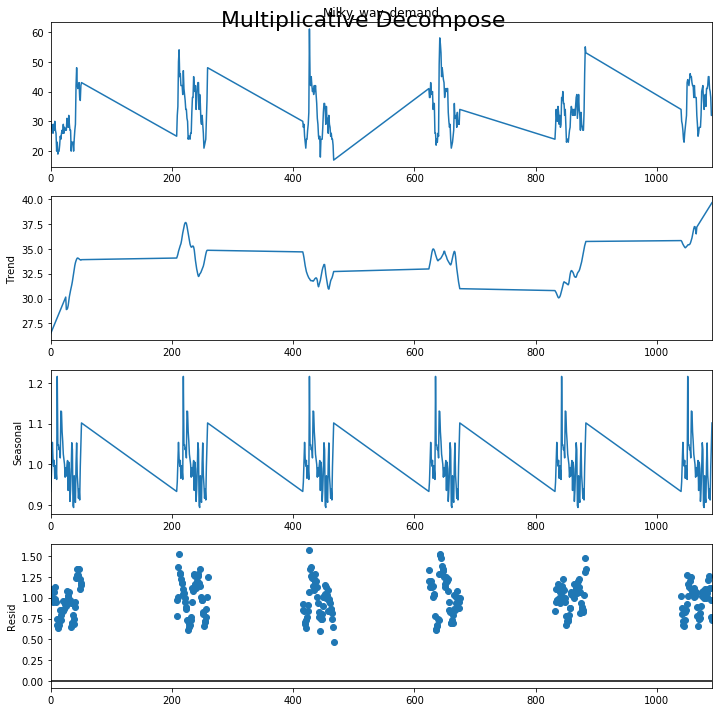

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_r1['Milky_way_demand'], period = 52, model='multiplicative', extrapolate_trend='freq')

# Plot
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()


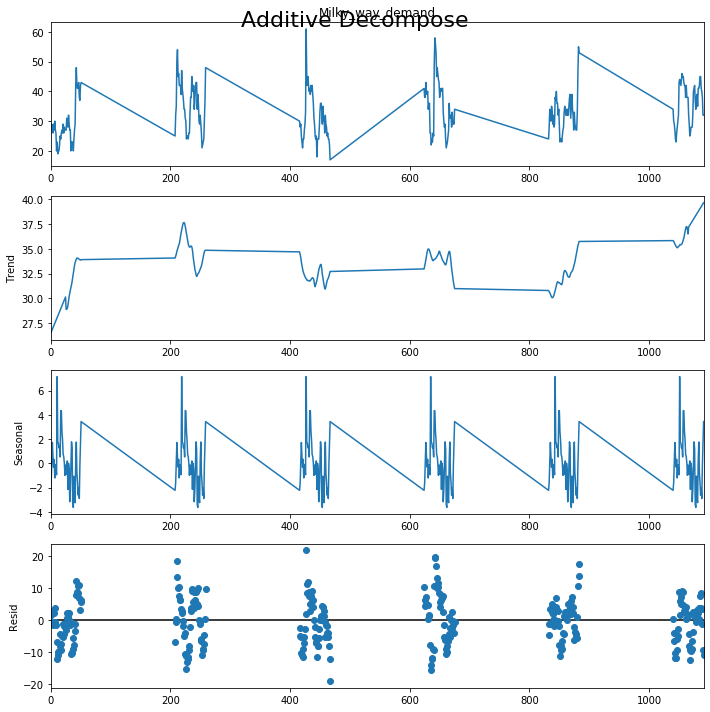

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df_r1['Milky_way_demand'], period = 52,model='additive', extrapolate_trend='freq')

# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


In [ ]:
c1 = df_r1['Milky_way_demand']
c2 = df_r4['Milky_way_demand']

In [ ]:
c1.corr(c2)

nan

In [ ]:
print(c1)

0       26
1       28
2       29
3       28
4       26
        ..
1087    41
1088    40
1089    38
1090    32
1091    32
Name: Milky_way_demand, Length: 312, dtype: int64


In [ ]:
print(c2)

104     37
105     31
106     27
107     28
108     25
        ..
1191    21
1192    24
1193    28
1194    32
1195    32
Name: Milky_way_demand, Length: 312, dtype: int64
